In [1]:
# Pandas for Everyone Read Along
# Part III. Data Munging
# Created 11/19/20

%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import xlwt
import openpyxl
import numba

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
tips = sns.load_dataset('tips')
print(tips.info())
tips

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.0 KB
None


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
tips['sex_str'] = tips['sex'].astype(str)
print(tips.dtypes)

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
sex_str         object
dtype: object


In [4]:
tips['new_col'] = list(range(len(tips['sex_str'])))

In [5]:
print(tips.info())
tips

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
 7   sex_str     244 non-null    object  
 8   new_col     244 non-null    int64   
dtypes: category(4), float64(2), int64(2), object(1)
memory usage: 9.9+ KB
None


,total_bill,tip,sex,smoker,day,time,size,sex_str,new_col
0,16.99,1.01,Female,No,Sun,Dinner,2,Female,0
1,10.34,1.66,Male,No,Sun,Dinner,3,Male,1
2,21.01,3.50,Male,No,Sun,Dinner,3,Male,2
3,23.68,3.31,Male,No,Sun,Dinner,2,Male,3
4,24.59,3.61,Female,No,Sun,Dinner,4,Female,4
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,Male,239
240,27.18,2.00,Female,Yes,Sat,Dinner,2,Female,240
241,22.67,2.00,Male,Yes,Sat,Dinner,2,Male,241
242,17.82,1.75,Male,No,Sat,Dinner,2,Male,242


In [6]:
tips.rename(columns={'new_col': 'uid'}, inplace=True)

In [7]:
tips

,total_bill,tip,sex,smoker,day,time,size,sex_str,uid
0,16.99,1.01,Female,No,Sun,Dinner,2,Female,0
1,10.34,1.66,Male,No,Sun,Dinner,3,Male,1
2,21.01,3.50,Male,No,Sun,Dinner,3,Male,2
3,23.68,3.31,Male,No,Sun,Dinner,2,Male,3
4,24.59,3.61,Female,No,Sun,Dinner,4,Female,4
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,Male,239
240,27.18,2.00,Female,Yes,Sat,Dinner,2,Female,240
241,22.67,2.00,Male,Yes,Sat,Dinner,2,Male,241
242,17.82,1.75,Male,No,Sat,Dinner,2,Male,242


In [8]:
tips_sub_miss = tips.head(10)
print(tips_sub_miss.info())
tips_sub_miss
tips_sub_miss.loc[[1,3,5,7], ['total_bill']]='missing'
print(tips_sub_miss.info())
tips_sub_miss

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  10 non-null     float64 
 1   tip         10 non-null     float64 
 2   sex         10 non-null     category
 3   smoker      10 non-null     category
 4   day         10 non-null     category
 5   time        10 non-null     category
 6   size        10 non-null     int64   
 7   sex_str     10 non-null     object  
 8   uid         10 non-null     int64   
dtypes: category(4), float64(2), int64(2), object(1)
memory usage: 744.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  10 non-null     object  
 1   tip         10 non-null     float64 
 2   sex         10 non-null     category
 3   smoker      10 non-null     category

,total_bill,tip,sex,smoker,day,time,size,sex_str,uid
0,16.99,1.01,Female,No,Sun,Dinner,2,Female,0
1,missing,1.66,Male,No,Sun,Dinner,3,Male,1
2,21.01,3.50,Male,No,Sun,Dinner,3,Male,2
3,missing,3.31,Male,No,Sun,Dinner,2,Male,3
4,24.59,3.61,Female,No,Sun,Dinner,4,Female,4
5,missing,4.71,Male,No,Sun,Dinner,4,Male,5
6,8.77,2.00,Male,No,Sun,Dinner,2,Male,6
7,missing,3.12,Male,No,Sun,Dinner,4,Male,7
8,15.04,1.96,Male,No,Sun,Dinner,2,Male,8
9,14.78,3.23,Male,No,Sun,Dinner,2,Male,9


In [9]:
tips_sub_miss['total_bill'] = pd.to_numeric(tips_sub_miss['total_bill'],
                                            errors='coerce')
print(tips_sub_miss.info())
tips_sub_miss

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  6 non-null      float64 
 1   tip         10 non-null     float64 
 2   sex         10 non-null     category
 3   smoker      10 non-null     category
 4   day         10 non-null     category
 5   time        10 non-null     category
 6   size        10 non-null     int64   
 7   sex_str     10 non-null     object  
 8   uid         10 non-null     int64   
dtypes: category(4), float64(2), int64(2), object(1)
memory usage: 744.0+ bytes
None


,total_bill,tip,sex,smoker,day,time,size,sex_str,uid
0,16.99,1.01,Female,No,Sun,Dinner,2,Female,0
1,NaN,1.66,Male,No,Sun,Dinner,3,Male,1
2,21.01,3.50,Male,No,Sun,Dinner,3,Male,2
3,NaN,3.31,Male,No,Sun,Dinner,2,Male,3
4,24.59,3.61,Female,No,Sun,Dinner,4,Female,4
5,NaN,4.71,Male,No,Sun,Dinner,4,Male,5
6,8.77,2.00,Male,No,Sun,Dinner,2,Male,6
7,NaN,3.12,Male,No,Sun,Dinner,4,Male,7
8,15.04,1.96,Male,No,Sun,Dinner,2,Male,8
9,14.78,3.23,Male,No,Sun,Dinner,2,Male,9


In [10]:
tips_sub_miss['sex'] = tips_sub_miss['sex'].astype(str)
print(tips_sub_miss.info())
tips_sub_miss

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  6 non-null      float64 
 1   tip         10 non-null     float64 
 2   sex         10 non-null     object  
 3   smoker      10 non-null     category
 4   day         10 non-null     category
 5   time        10 non-null     category
 6   size        10 non-null     int64   
 7   sex_str     10 non-null     object  
 8   uid         10 non-null     int64   
dtypes: category(3), float64(2), int64(2), object(2)
memory usage: 718.0+ bytes
None


,total_bill,tip,sex,smoker,day,time,size,sex_str,uid
0,16.99,1.01,Female,No,Sun,Dinner,2,Female,0
1,NaN,1.66,Male,No,Sun,Dinner,3,Male,1
2,21.01,3.50,Male,No,Sun,Dinner,3,Male,2
3,NaN,3.31,Male,No,Sun,Dinner,2,Male,3
4,24.59,3.61,Female,No,Sun,Dinner,4,Female,4
5,NaN,4.71,Male,No,Sun,Dinner,4,Male,5
6,8.77,2.00,Male,No,Sun,Dinner,2,Male,6
7,NaN,3.12,Male,No,Sun,Dinner,4,Male,7
8,15.04,1.96,Male,No,Sun,Dinner,2,Male,8
9,14.78,3.23,Male,No,Sun,Dinner,2,Male,9


In [12]:
tips_sub_miss['sex'] = tips_sub_miss['sex'].astype('category')
print(tips_sub_miss.info())
tips_sub_miss

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  6 non-null      float64 
 1   tip         10 non-null     float64 
 2   sex         10 non-null     category
 3   smoker      10 non-null     category
 4   day         10 non-null     category
 5   time        10 non-null     category
 6   size        10 non-null     int64   
 7   sex_str     10 non-null     object  
 8   uid         10 non-null     int64   
dtypes: category(4), float64(2), int64(2), object(1)
memory usage: 744.0+ bytes
None


,total_bill,tip,sex,smoker,day,time,size,sex_str,uid
0,16.99,1.01,Female,No,Sun,Dinner,2,Female,0
1,NaN,1.66,Male,No,Sun,Dinner,3,Male,1
2,21.01,3.50,Male,No,Sun,Dinner,3,Male,2
3,NaN,3.31,Male,No,Sun,Dinner,2,Male,3
4,24.59,3.61,Female,No,Sun,Dinner,4,Female,4
5,NaN,4.71,Male,No,Sun,Dinner,4,Male,5
6,8.77,2.00,Male,No,Sun,Dinner,2,Male,6
7,NaN,3.12,Male,No,Sun,Dinner,4,Male,7
8,15.04,1.96,Male,No,Sun,Dinner,2,Male,8
9,14.78,3.23,Male,No,Sun,Dinner,2,Male,9


In [13]:
tips_sub_miss['sex'].cat.categories

Index(['Female', 'Male'], dtype='object')

In [14]:
tips_sub_miss['sex'].cat.codes

0    0
1    1
2    1
3    1
4    0
5    1
6    1
7    1
8    1
9    1
dtype: int8

In [15]:
tips_sub_miss['sex'].cat.ordered

False

In [17]:
tips_sub_miss['sex'].cat.as_ordered()

0    Female
1      Male
2      Male
3      Male
4    Female
5      Male
6      Male
7      Male
8      Male
9      Male
Name: sex, dtype: category
Categories (2, object): ['Female' < 'Male']

In [18]:
tips_sub_miss['sex'].cat.codes

0    0
1    1
2    1
3    1
4    0
5    1
6    1
7    1
8    1
9    1
dtype: int8

In [70]:
df = pd.DataFrame({'a':list(range(0, 100000, 1)),
                  'b': list(range(0, 1000000, 10))})
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   a       100000 non-null  int64
 1   b       100000 non-null  int64
dtypes: int64(2)
memory usage: 1.5 MB


,a,b
0,0,0
1,1,10
2,2,20
3,3,30
4,4,40
...,...,...
99995,99995,999950
99996,99996,999960
99997,99997,999970
99998,99998,999980


In [56]:
def avg_2_apply(row):
    x = row[0]
    y = row[1]
    if (x == 20):
        return np.nan
    else:
        return (x + y)/2

In [71]:
%%timeit
df.apply(avg_2_apply, axis=1)

1.37 s ± 14.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [58]:
@np.vectorize
def v_avg_2_mod(x, y):
    if (x == 20):
        return(np.NaN)
    else:
        return (x + y)/2

In [72]:
%%timeit
v_avg_2_mod(df['a'], df['b'])

36 ms ± 639 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [73]:
@numba.vectorize
def v_avg_2_numba_1(x, y):
    if (int(x) == 20):
        return(np.NaN)
    else:
        return (x + y)/2

In [74]:
%%timeit
v_avg_2_numba_1(df['a'].values, df['b'].values)

482 µs ± 2.52 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [75]:
@numba.vectorize
def v_avg_2_numba_2(x, y):
    if (int(x) == 20):
        return(np.NaN)
    else:
        return (float(x) + float(y))/2

In [76]:
%%timeit
v_avg_2_numba_2(df['a'].values, df['b'].values)

464 µs ± 5.95 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [77]:
def v_avg_4_mod(x, y):
    a = np.empty(x.size)
    a[:] = np.NaN
    b = np.where(x==20)
    a[b] = (x[b] + y[b])/2

In [81]:
%%timeit
v_avg_4_mod(df['a'].values, df['b'].values)

541 µs ± 2.46 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [79]:
def v_avg_3_mod(x, y):
    z = (x + y)/2
    z[np.where(x==20)]=np.NaN

In [82]:
%%timeit
v_avg_3_mod(df['a'].values, df['b'].values)

1.03 ms ± 7.54 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [83]:
@numba.jit(nopython=True)
def v_avg_4_mod(x, y):
    z = (x + y)/2
    z[np.where(x==20)]=np.NaN

In [84]:
%%timeit
v_avg_4_mod(df['a'].values, df['b'].values)

695 µs ± 27.7 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [53]:
a = list(range(0, 1000))
len(a)

1000

In [54]:
b = list(range(0, 10000, 10))
len(b)

1000

In [93]:
df = pd.DataFrame({'a': [10, 20, 30],
                  'b': [100, 200, 300]})
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   a       3 non-null      int64
 1   b       3 non-null      int64
dtypes: int64(2)
memory usage: 112.0 bytes


,a,b
0,10,100
1,20,200
2,30,300


In [94]:
def square_me(x):
    return x**2

In [103]:
def print_me(x):
#     print('In print_me')
    print(x)

In [105]:
c = df['b'].apply(print_me)

100
200
300


In [108]:
df.apply(print_me, axis=0);

0    10
1    20
2    30
Name: a, dtype: int64
0    100
1    200
2    300
Name: b, dtype: int64


In [109]:
df.apply(print_me, axis=1);

a     10
b    100
Name: 0, dtype: int64
a     20
b    200
Name: 1, dtype: int64
a     30
b    300
Name: 2, dtype: int64


In [110]:
def my_avg(x):
    return np.mean(x)

In [111]:
df.apply(my_avg, axis=0)

a     20.0
b    200.0
dtype: float64

In [112]:
df.apply(my_avg, axis=1)

0     55.0
1    110.0
2    165.0
dtype: float64

In [113]:
import seaborn as sns

In [114]:
titanic = sns.load_dataset("titanic")

In [115]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 63.0+ KB


In [123]:
def count_missing(x):
    return np.count_nonzero(x.isnull())

In [149]:
def count(x):
    return len(x)

In [150]:
def fraction(x):
    return count_missing(x)/count(x)

In [137]:
a = titanic.apply(count_missing)
b = titanic.isnull().sum(axis = 0)

In [138]:
print(type(a))
a

<class 'pandas.core.series.Series'>


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [139]:
print(type(b))
b

<class 'pandas.core.series.Series'>


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [142]:
print(a == b)
print(a is b)

survived       True
pclass         True
sex            True
age            True
sibsp          True
parch          True
fare           True
embarked       True
class          True
who            True
adult_male     True
deck           True
embark_town    True
alive          True
alone          True
dtype: bool
False


In [143]:
%%timeit
titanic.apply(count_missing)

2.67 ms ± 23.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [144]:
%%timeit
titanic.isnull().sum(axis = 0)

1.03 ms ± 11.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [154]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [153]:
titanic.count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

In [155]:
titanic.isnull().sum() / max(titanic.count())

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

In [151]:
titanic.apply(fraction)

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

In [157]:
docs = pd.read_csv('book_resources/data/doctors.csv', header=None)
print(docs.info())
docs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       13 non-null     object
dtypes: object(1)
memory usage: 116.0+ bytes
None


,0
0,William Hartnell (1963-66)
1,Patrick Troughton (1966-69)
2,Jon Pertwee (1970 74)
3,Tom Baker (1974-81)
4,Peter Davison (1982-84)
5,Colin Baker (1984-86)
6,Sylvester McCoy (1987-89)
7,Paul McGann (1996)
8,Christopher Eccleston (2005)
9,David Tennant (2005-10)


In [163]:
import re
p = re.compile('\w+\s+\w+')

In [168]:
def get_name(s):
    return p.match(s).group()

In [169]:
get_name('William Hartnell (1963-66)')

'William Hartnell'

In [170]:
docs['name_only'] = docs[0].apply(lambda x: p.match(x).group())
docs

,0,name_only
0,William Hartnell (1963-66),William Hartnell
1,Patrick Troughton (1966-69),Patrick Troughton
2,Jon Pertwee (1970 74),Jon Pertwee
3,Tom Baker (1974-81),Tom Baker
4,Peter Davison (1982-84),Peter Davison
5,Colin Baker (1984-86),Colin Baker
6,Sylvester McCoy (1987-89),Sylvester McCoy
7,Paul McGann (1996),Paul McGann
8,Christopher Eccleston (2005),Christopher Eccleston
9,David Tennant (2005-10),David Tennant


In [171]:
df = pd.read_csv('book_resources/data/gapminder.tsv', sep='\t')
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 66.6+ KB
None


,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [197]:
a = df.groupby(['country'])['lifeExp'].min()
print(type(a))
a

<class 'pandas.core.series.Series'>


country
Afghanistan           28.801
Albania               55.230
Algeria               43.077
Angola                30.015
Argentina             62.485
                       ...  
Vietnam               40.412
West Bank and Gaza    43.160
Yemen, Rep.           32.548
Zambia                39.193
Zimbabwe              39.989
Name: lifeExp, Length: 142, dtype: float64

In [201]:
b = min(a)
print(type(b))
b

<class 'float'>


23.599

In [206]:
c = a == b
print(type(c))
c

<class 'pandas.core.series.Series'>


country
Afghanistan           False
Albania               False
Algeria               False
Angola                False
Argentina             False
                      ...  
Vietnam               False
West Bank and Gaza    False
Yemen, Rep.           False
Zambia                False
Zimbabwe              False
Name: lifeExp, Length: 142, dtype: bool

In [207]:
a[c]

country
Rwanda    23.599
Name: lifeExp, dtype: float64

In [209]:
df[df['lifeExp'] == b]

,country,continent,year,lifeExp,pop,gdpPercap
1292,Rwanda,Africa,1992,23.599,7290203,737.068595


In [210]:
avg_life_by_year = df.groupby('year').lifeExp.mean()
avg_life_by_year

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [212]:
d = df.year
print(type(d))
d

<class 'pandas.core.series.Series'>


0       1952
1       1957
2       1962
3       1967
4       1972
        ... 
1699    1987
1700    1992
1701    1997
1702    2002
1703    2007
Name: year, Length: 1704, dtype: int64

In [213]:
e = d.unique()
print(type(e))
e

<class 'numpy.ndarray'>


array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007], dtype=int64)

In [214]:
y1952 = df[df.year == 1952]
print(type(y1952))
y1952

<class 'pandas.core.frame.DataFrame'>


,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
12,Albania,Europe,1952,55.230,1282697,1601.056136
24,Algeria,Africa,1952,43.077,9279525,2449.008185
36,Angola,Africa,1952,30.015,4232095,3520.610273
48,Argentina,Americas,1952,62.485,17876956,5911.315053
...,...,...,...,...,...,...
1644,Vietnam,Asia,1952,40.412,26246839,605.066492
1656,West Bank and Gaza,Asia,1952,43.160,1030585,1515.592329
1668,"Yemen, Rep.",Asia,1952,32.548,4963829,781.717576
1680,Zambia,Africa,1952,42.038,2672000,1147.388831


In [216]:
g = y1952.lifeExp
print(type(g))
g

<class 'pandas.core.series.Series'>


0       28.801
12      55.230
24      43.077
36      30.015
48      62.485
         ...  
1644    40.412
1656    43.160
1668    32.548
1680    42.038
1692    48.451
Name: lifeExp, Length: 142, dtype: float64

In [217]:
h = g.mean()
print(type(h))
h

<class 'numpy.float64'>


49.057619718309866

In [219]:
avg_life_by_year = df.groupby('year').lifeExp.describe()
avg_life_by_year

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
1952,142.0,49.057620,12.225956,28.801,39.05900,45.1355,59.76500,72.670
1957,142.0,51.507401,12.231286,30.332,41.24750,48.3605,63.03675,73.470
1962,142.0,53.609249,12.097245,31.997,43.46850,50.8810,65.23450,73.680
1967,142.0,55.678290,11.718858,34.020,46.03375,53.8250,67.41950,74.160
1972,142.0,57.647386,11.381953,35.400,48.50025,56.5300,69.24750,74.720
1977,142.0,59.570157,11.227229,31.220,50.47550,59.6720,70.38250,76.110
1982,142.0,61.533197,10.770618,38.445,52.94000,62.4415,70.92125,77.110
1987,142.0,63.212613,10.556285,39.906,54.94075,65.8340,71.87725,78.670
1992,142.0,64.160338,11.227380,23.599,56.12175,67.7030,72.58250,79.360


In [220]:
avg_life_by_year = df.groupby(['continent', 'year']).lifeExp.describe()
avg_life_by_year

count       mean        std     min       25%      50%  \
continent year                                                           
Africa    1952   52.0  39.135500   5.151581  30.000  35.81175  38.8330   
          1957   52.0  41.266346   5.620123  31.570  37.43000  40.5925   
          1962   52.0  43.319442   5.875364  32.767  39.48400  42.6305   
          1967   52.0  45.334538   6.082673  34.113  41.36850  44.6985   
          1972   52.0  47.450942   6.416258  35.400  43.29800  47.0315   
          1977   52.0  49.580423   6.808197  36.788  44.51300  49.2725   
          1982   52.0  51.592865   7.375940  38.445  45.62650  50.7560   
          1987   52.0  53.344788   7.864089  39.906  46.83550  51.6395   
          1992   52.0  53.629577   9.461071  23.599  47.95450  52.4290   
          1997   52.0  53.598269   9.103387  36.087  47.30025  52.7590   
          2002   52.0  53.325231   9.586496  39.193  45.82800  51.2355   
          2007   52.0  54.806038   9.630781  39.613  47.83400  52.9265   
Americas  1952   25.0  53.279840   9.326082  37.579  45.26200  54.7450   
          1957   25.0  55.960280   9.033192  40.696  48.57000  56.0740   
          1962   25.0  58.398760   8.503544  43.428  52.30700  58.2990   
          1967   25.0  60.410920   7.909171  45.032  55.85500  60.5230   
          1972   25.0  62.394920   7.323017  46.714  58.20700  63.4410   
          1977   25.0  64.391560   7.069496  49.923  58.44700  66.3530   
          1982   25.0  66.228840   6.720834  51.461  61.40600  67.4050   
          1987   25.0  68.090720   5.801929  53.636  64.49200  69.4980   
          1992   25.0  69.568360   5.167104  55.089  66.79800  69.8620   
          1997   25.0  71.150480   4.887584  56.671  69.38800  72.1460   
          2002   25.0  72.422040   4.799705  58.137  70.73400  72.0470   
          2007   25.0  73.608120   4.440948  60.916  71.75200  72.8990   
Asia      1952   33.0  46.314394   9.291751  28.801  39.41700  44.8690   
          1957   33.0  49.318544   9.635429  30.332  41.90500  48.2840   
          1962   33.0  51.563223   9.820632  31.997  44.50136  49.3250   
          1967   33.0  54.663640   9.650965  34.020  47.83800  53.6550   
          1972   33.0  57.319269   9.722700  36.088  51.92900  56.9500   
          1977   33.0  59.610556  10.022197  31.220  55.49100  60.7650   
          1982   33.0  62.617939   8.535221  39.854  57.48900  63.7390   
          1987   33.0  64.851182   8.203792  40.822  60.13700  66.2950   
          1992   33.0  66.537212   8.075549  41.674  60.83800  68.6900   
          1997   33.0  68.020515   8.091171  41.763  61.81800  70.2650   
          2002   33.0  69.233879   8.374595  42.129  63.61000  71.0280   
          2007   33.0  70.728485   7.963724  43.828  65.48300  72.3960   
Europe    1952   30.0  64.408500   6.361088  43.585  61.09000  65.9000   
          1957   30.0  66.703067   5.295805  48.079  65.02000  67.6500   
          1962   30.0  68.539233   4.302500  52.098  67.25750  69.5250   
          1967   30.0  69.737600   3.799728  54.336  68.67000  70.6100   
          1972   30.0  70.775033   3.240576  57.005  69.77500  70.8850   
          1977   30.0  71.937767   3.121030  59.507  70.49750  72.3350   
          1982   30.0  72.806400   3.218260  61.036  70.84000  73.4900   
          1987   30.0  73.642167   3.169680  63.108  71.38500  74.8150   
          1992   30.0  74.440100   3.209781  66.146  71.78875  75.4510   
          1997   30.0  75.505167   3.104677  68.835  73.02350  76.1160   
          2002   30.0  76.700600   2.922180  70.845  74.23500  77.5365   
          2007   30.0  77.648600   2.979813  71.777  75.02975  78.6085   
Oceania   1952    2.0  69.255000   0.190919  69.120  69.18750  69.2550   
          1957    2.0  70.295000   0.049497  70.260  70.27750  70.2950   
          1962    2.0  71.085000   0.219203  70.930  71.00750  71.0850   
          1967    2.0  71.310000   0.296985  71.100  71.20500  71.3100   
          1972    2.

In [222]:
avg_life_by_year = df.groupby(['continent', 'year']).lifeExp.agg(np.mean)
print(type(avg_life_by_year))
avg_life_by_year

<class 'pandas.core.series.Series'>


continent  year
Africa     1952    39.135500
           1957    41.266346
           1962    43.319442
           1967    45.334538
           1972    47.450942
           1977    49.580423
           1982    51.592865
           1987    53.344788
           1992    53.629577
           1997    53.598269
           2002    53.325231
           2007    54.806038
Americas   1952    53.279840
           1957    55.960280
           1962    58.398760
           1967    60.410920
           1972    62.394920
           1977    64.391560
           1982    66.228840
           1987    68.090720
           1992    69.568360
           1997    71.150480
           2002    72.422040
           2007    73.608120
Asia       1952    46.314394
           1957    49.318544
           1962    51.563223
           1967    54.663640
           1972    57.319269
           1977    59.610556
           1982    62.617939
           1987    64.851182
           1992    66.537212
           1997    68.02051

In [223]:
avg_life_by_year.index

MultiIndex([(  'Africa', 1952),
            (  'Africa', 1957),
            (  'Africa', 1962),
            (  'Africa', 1967),
            (  'Africa', 1972),
            (  'Africa', 1977),
            (  'Africa', 1982),
            (  'Africa', 1987),
            (  'Africa', 1992),
            (  'Africa', 1997),
            (  'Africa', 2002),
            (  'Africa', 2007),
            ('Americas', 1952),
            ('Americas', 1957),
            ('Americas', 1962),
            ('Americas', 1967),
            ('Americas', 1972),
            ('Americas', 1977),
            ('Americas', 1982),
            ('Americas', 1987),
            ('Americas', 1992),
            ('Americas', 1997),
            ('Americas', 2002),
            ('Americas', 2007),
            (    'Asia', 1952),
            (    'Asia', 1957),
            (    'Asia', 1962),
            (    'Asia', 1967),
            (    'Asia', 1972),
            (    'Asia', 1977),
            (    'Asia', 1982),
        

In [228]:
avg_life_by_year_f = avg_life_by_year.reset_index()
print(type(avg_life_by_year_f))
print(avg_life_by_year_f.index)
avg_life_by_year_f

<class 'pandas.core.frame.DataFrame'>
RangeIndex(start=0, stop=60, step=1)


,continent,year,lifeExp
0,Africa,1952,39.135500
1,Africa,1957,41.266346
2,Africa,1962,43.319442
3,Africa,1967,45.334538
4,Africa,1972,47.450942
5,Africa,1977,49.580423
6,Africa,1982,51.592865
7,Africa,1987,53.344788
8,Africa,1992,53.629577
9,Africa,1997,53.598269


In [229]:
print(type(avg_life_by_year_f))
print(avg_life_by_year_f)

<class 'pandas.core.frame.DataFrame'>
   continent  year    lifeExp
0     Africa  1952  39.135500
1     Africa  1957  41.266346
2     Africa  1962  43.319442
3     Africa  1967  45.334538
4     Africa  1972  47.450942
5     Africa  1977  49.580423
6     Africa  1982  51.592865
7     Africa  1987  53.344788
8     Africa  1992  53.629577
9     Africa  1997  53.598269
10    Africa  2002  53.325231
11    Africa  2007  54.806038
12  Americas  1952  53.279840
13  Americas  1957  55.960280
14  Americas  1962  58.398760
15  Americas  1967  60.410920
16  Americas  1972  62.394920
17  Americas  1977  64.391560
18  Americas  1982  66.228840
19  Americas  1987  68.090720
20  Americas  1992  69.568360
21  Americas  1997  71.150480
22  Americas  2002  72.422040
23  Americas  2007  73.608120
24      Asia  1952  46.314394
25      Asia  1957  49.318544
26      Asia  1962  51.563223
27      Asia  1967  54.663640
28      Asia  1972  57.319269
29      Asia  1977  59.610556
30      Asia  1982  62.617939
31

In [230]:
avg_life_by_year_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   continent  60 non-null     object 
 1   year       60 non-null     int64  
 2   lifeExp    60 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ KB


In [232]:
avg_life_by_year_f['c'] = avg_life_by_year_f.continent.astype('category')
avg_life_by_year_f['y'] = avg_life_by_year_f.year.astype('category')

In [234]:
print(avg_life_by_year_f.info())
avg_life_by_year_f;

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   continent  60 non-null     object  
 1   year       60 non-null     int64   
 2   lifeExp    60 non-null     float64 
 3   c          60 non-null     category
 4   y          60 non-null     category
dtypes: category(2), float64(1), int64(1), object(1)
memory usage: 1.8+ KB
None


In [236]:
print(avg_life_by_year_f.y.cat.categories)
print(avg_life_by_year_f.c.cat.categories)

Int64Index([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
            2007],
           dtype='int64')
Index(['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'], dtype='object')


In [237]:
def my_avg(x):
    count = 0
    total = 0
    for i in x:
        if not np.isnan(i):
            count += 1
            total += i
    return total/count
            

In [243]:
def my_avg2(x, offset):
    count = 0
    total = 0
    for i in x:
        if not np.isnan(i):
            count += 1
            total += i
    return (total/count) - offset

In [238]:
test1 = list(range(0, 20, 2))
a = my_avg(test1)
a

9.0

In [239]:
test2 = [10, 20, 30, np.nan]
b = my_avg(test2)
b

20.0

In [240]:
# test3 = [10, 20, 30, np.nan, 'soup']
# c = my_avg(test3)
# c

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [241]:
d = df.groupby('year').lifeExp.agg(my_avg)
print(type(d))
d

<class 'pandas.core.series.Series'>


year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [242]:
avg_life = df.lifeExp.mean()
print(type(avg_life))
avg_life

<class 'numpy.float64'>


59.474439366197174

In [244]:
e = df.groupby('year').lifeExp.agg(my_avg2, offset=avg_life)
print(type(e))
e

<class 'pandas.core.series.Series'>


year
1952   -10.416820
1957    -7.967038
1962    -5.865190
1967    -3.796150
1972    -1.827053
1977     0.095718
1982     2.058758
1987     3.738173
1992     4.685899
1997     5.540237
2002     6.220483
2007     7.532983
Name: lifeExp, dtype: float64

In [249]:
a = np.array([[0, 1, 7, 0],
              [3, 0, 2, np.nan]])
np.count_nonzero(np.isfinite(a))

7

In [251]:
func1 = [np.count_nonzero, np.mean, np.std]
b = df.groupby('year').lifeExp.agg(func1)
print(type(b))
b

<class 'pandas.core.frame.DataFrame'>


,count_nonzero,mean,std
year,,,
1952,142.0,49.057620,12.225956
1957,142.0,51.507401,12.231286
1962,142.0,53.609249,12.097245
1967,142.0,55.678290,11.718858
1972,142.0,57.647386,11.381953
1977,142.0,59.570157,11.227229
1982,142.0,61.533197,10.770618
1987,142.0,63.212613,10.556285
1992,142.0,64.160338,11.227380


In [253]:
def finite(x):
    return np.count_nonzero(np.isfinite(x))

def finite_and_nz(x):
    a = np.isfinite(x)
    b = np.count_nonzero(x[a])
    return b


In [254]:
func2 = [finite, np.count_nonzero, finite_and_nz, np.mean, np.std]
c = df.groupby('year').lifeExp.agg(func2)
print(type(c))
c

<class 'pandas.core.frame.DataFrame'>


,finite,count_nonzero,finite_and_nz,mean,std
year,,,,,
1952,142.0,142.0,142.0,49.057620,12.225956
1957,142.0,142.0,142.0,51.507401,12.231286
1962,142.0,142.0,142.0,53.609249,12.097245
1967,142.0,142.0,142.0,55.678290,11.718858
1972,142.0,142.0,142.0,57.647386,11.381953
1977,142.0,142.0,142.0,59.570157,11.227229
1982,142.0,142.0,142.0,61.533197,10.770618
1987,142.0,142.0,142.0,63.212613,10.556285
1992,142.0,142.0,142.0,64.160338,11.227380


In [270]:
# country	continent	year	lifeExp	pop	gdpPercap
dict1 = {'lifeExp': 'mean', 'pop': 'max', 'gdpPercap': 'describe'}

In [271]:
d = df.groupby('year').agg(dict1)
print(type(d))
d

<class 'pandas.core.frame.DataFrame'>


lifeExp         pop gdpPercap                                          \
        lifeExp         pop     count          mean           std         min   
year                                                                            
1952  49.057620   556263527     142.0   3725.276046   9321.064786  298.846212   
1957  51.507401   637408000     142.0   4299.408345   9869.662202  335.997115   
1962  53.609249   665770000     142.0   4725.812342   8667.362525  355.203227   
1967  55.678290   754550000     142.0   5483.653047   8095.315431  349.000000   
1972  57.647386   862030000     142.0   6770.082815  10614.383403  357.000000   
1977  59.570157   943455000     142.0   7313.166421   8362.489150  371.000000   
1982  61.533197  1000281000     142.0   7518.901673   7733.845006  424.000000   
1987  63.212613  1084035000     142.0   7900.920218   8288.281304  385.000000   
1992  64.160338  1164970000     142.0   8158.608521   9031.846080  347.000000   
1997  65.014676  1230075000     142.0   9090.175363  10171.493263  312.188423   
2002  65.694923  1280400000     142.0   9917.848365  11154.114865  241.165877   
2007  67.007423  1318683096     142.0  11680.071820  12859.937337  277.551859   

                                                            
              25%          50%           75%           max  
year                                                        
1952   864.752389  1968.528344   3913.492777  108382.35290  
1957   930.540819  2173.220291   4876.356362  113523.13290  
1962  1059.149171  2335.439533   5709.381428   95458.11176  
1967  1151.245103  2678.334741   7075.932943   80894.88326  
1972  1257.193853  3339.129407   9508.839303  109347.86700  
1977  1357.257252  3798.609244  11204.102423   59265.47714  
1982  1363.338985  4216.228428  12347.953723   33693.17525  
1987  1327.469823  4280.300366  11994.052795   31540.97480  
1992  1270.660958  4386.085502  10684.351870   34932.91959  
1997  1366.837958  4781.825478  12022.867188   41283.16433  
2002  1409.567264  5319.804524  13359.512257   44683.97525  
2007  1624.842248  6124.371109  18008.835640   49357.19017

In [272]:
func3 = [np.count_nonzero, np.mean, np.std]
d = df.groupby('year').lifeExp.agg(func3)
print(type(d))
d

<class 'pandas.core.frame.DataFrame'>


,count_nonzero,mean,std
year,,,
1952,142.0,49.057620,12.225956
1957,142.0,51.507401,12.231286
1962,142.0,53.609249,12.097245
1967,142.0,55.678290,11.718858
1972,142.0,57.647386,11.381953
1977,142.0,59.570157,11.227229
1982,142.0,61.533197,10.770618
1987,142.0,63.212613,10.556285
1992,142.0,64.160338,11.227380


In [273]:
e = d.rename(columns={'count_nonzero': 'count',
                     'mean': 'blue meannies',
                     'std': 'standard dev'})
print(type(e))
e

<class 'pandas.core.frame.DataFrame'>


,count,blue meannies,standard dev
year,,,
1952,142.0,49.057620,12.225956
1957,142.0,51.507401,12.231286
1962,142.0,53.609249,12.097245
1967,142.0,55.678290,11.718858
1972,142.0,57.647386,11.381953
1977,142.0,59.570157,11.227229
1982,142.0,61.533197,10.770618
1987,142.0,63.212613,10.556285
1992,142.0,64.160338,11.227380


In [275]:
e.index

Int64Index([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
            2007],
           dtype='int64', name='year')

In [276]:
e.columns

Index(['count', 'blue meannies', 'standard dev'], dtype='object')

In [274]:
f = e.reset_index()
print(type(f))
f

<class 'pandas.core.frame.DataFrame'>


,year,count,blue meannies,standard dev
0,1952,142.0,49.057620,12.225956
1,1957,142.0,51.507401,12.231286
2,1962,142.0,53.609249,12.097245
3,1967,142.0,55.678290,11.718858
4,1972,142.0,57.647386,11.381953
5,1977,142.0,59.570157,11.227229
6,1982,142.0,61.533197,10.770618
7,1987,142.0,63.212613,10.556285
8,1992,142.0,64.160338,11.227380
9,1997,142.0,65.014676,11.559439


In [278]:
from scipy.stats import zscore

In [289]:
def my_zscore(x):
    return (x - np.mean(x)) / np.std(x)

In [292]:
df['my_zscore'] = df.groupby('year').lifeExp.transform(my_zscore)
df

,country,continent,year,lifeExp,pop,gdpPercap,my_zscore
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,-1.662719
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,-1.737377
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,-1.792867
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,-1.854699
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,-1.900878
...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,-0.081910
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,-0.338167
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,-1.580537
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,-2.100756


In [293]:
df['sci_zscore'] = zscore(df.lifeExp)
df

,country,continent,year,lifeExp,pop,gdpPercap,my_zscore,sci_zscore
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,-1.662719,-2.375334
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,-1.737377,-2.256774
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,-1.792867,-2.127837
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,-1.854699,-1.971178
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,-1.900878,-1.811033
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,-0.081910,0.222759
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,-0.338167,0.069894
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,-1.580537,-0.980805
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,-2.100756,-1.508942


In [294]:
def fill_avg(x):
    avg = np.mean(x)
    x[np.isnan(x)] = avg
    return x

In [295]:
tips = sns.load_dataset('tips')
print(tips.info())
tips

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.0 KB
None


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [306]:
np.random.seed(42)
tips_10 = tips.sample(10)
tips_10

,total_bill,tip,sex,smoker,day,time,size
24,19.82,3.18,Male,No,Sat,Dinner,2
6,8.77,2.00,Male,No,Sun,Dinner,2
153,24.55,2.00,Male,No,Sun,Dinner,4
211,25.89,5.16,Male,Yes,Sat,Dinner,4
198,13.00,2.00,Female,Yes,Thur,Lunch,2
176,17.89,2.00,Male,Yes,Sun,Dinner,2
192,28.44,2.56,Male,Yes,Thur,Lunch,2
124,12.48,2.52,Female,No,Thur,Lunch,2
9,14.78,3.23,Male,No,Sun,Dinner,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2


In [307]:
tips_10.groupby('sex').count()

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Male,7,7,7,7,7,7
Female,3,3,3,3,3,3


In [308]:
tips_10.loc[np.random.permutation(tips_10.index)[:4], 'total_bill'] = np.nan

In [309]:
tips_10.groupby('sex').count()

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Male,4,7,7,7,7,7
Female,2,3,3,3,3,3


In [310]:
tips_10['fill_bill'] = tips_10.groupby('sex').total_bill.transform(fill_avg)
tips_10

,total_bill,tip,sex,smoker,day,time,size,fill_bill
24,19.82,3.18,Male,No,Sat,Dinner,2,19.8200
6,8.77,2.00,Male,No,Sun,Dinner,2,8.7700
153,NaN,2.00,Male,No,Sun,Dinner,4,17.9525
211,NaN,5.16,Male,Yes,Sat,Dinner,4,17.9525
198,NaN,2.00,Female,Yes,Thur,Lunch,2,13.9300
176,NaN,2.00,Male,Yes,Sun,Dinner,2,17.9525
192,28.44,2.56,Male,Yes,Thur,Lunch,2,28.4400
124,12.48,2.52,Female,No,Thur,Lunch,2,12.4800
9,14.78,3.23,Male,No,Sun,Dinner,2,14.7800
101,15.38,3.00,Female,Yes,Fri,Dinner,2,15.3800


In [311]:
tips = sns.load_dataset('tips')
print(tips.info())
tips

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.0 KB
None


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [329]:
df = pd.DataFrame({'A' : ['foo', 'cho', 'bar', 'cho', 'foo', 'bar',
                          'foo', 'bar', 'cho'],
                   'B' : [1, 2, 3, 4, 5, 6, 7, 8, 9],
                   'C' : [2.0, 5., 8., 1., 2., 9., 15., -4, 12]})
df

,A,B,C
0,foo,1,2.0
1,cho,2,5.0
2,bar,3,8.0
3,cho,4,1.0
4,foo,5,2.0
5,bar,6,9.0
6,foo,7,15.0
7,bar,8,-4.0
8,cho,9,12.0


In [330]:
grouped = df.groupby('A')
grouped

In [332]:
a = grouped.filter(lambda x: x['B'].mean() > 5.)
a

,A,B,C
2,bar,3,8.0
5,bar,6,9.0
7,bar,8,-4.0


In [335]:
def filter_fun(x):
    print(type(x))
    print(x.head())
    print(x['B'])
    print(x['B'].mean())
    print(x['B'].mean() > 4.5)
    return x['B'].mean() > 4.5

In [344]:
def filter_fun2(x):
    print(type(x))
    print(x.head())
    print(x['A'])
    print(x.iloc[0])
    print(x.iloc[0]['A'])
    print(x.iloc[0]['B'])
    print(x.iloc[0]['C'])
    
    if x.iloc[0, 0] == 'bar':
        return True
    else:
        return False
    

In [345]:
b = grouped.filter(filter_fun2)
b

<class 'pandas.core.frame.DataFrame'>
     A  B    C
2  bar  3  8.0
5  bar  6  9.0
7  bar  8 -4.0
2    bar
5    bar
7    bar
Name: A, dtype: object
A    bar
B      3
C      8
Name: 2, dtype: object
bar
3
8.0
<class 'pandas.core.frame.DataFrame'>
     A  B     C
1  cho  2   5.0
3  cho  4   1.0
8  cho  9  12.0
1    cho
3    cho
8    cho
Name: A, dtype: object
A    cho
B      2
C      5
Name: 1, dtype: object
cho
2
5.0
<class 'pandas.core.frame.DataFrame'>
     A  B     C
0  foo  1   2.0
4  foo  5   2.0
6  foo  7  15.0
0    foo
4    foo
6    foo
Name: A, dtype: object
A    foo
B      1
C      2
Name: 0, dtype: object
foo
1
2.0


,A,B,C
2,bar,3,8.0
5,bar,6,9.0
7,bar,8,-4.0


In [347]:
tips_10 = sns.load_dataset('tips').sample(10, random_state=42)
type(tips_10)
tips_10

,total_bill,tip,sex,smoker,day,time,size
24,19.82,3.18,Male,No,Sat,Dinner,2
6,8.77,2.00,Male,No,Sun,Dinner,2
153,24.55,2.00,Male,No,Sun,Dinner,4
211,25.89,5.16,Male,Yes,Sat,Dinner,4
198,13.00,2.00,Female,Yes,Thur,Lunch,2
176,17.89,2.00,Male,Yes,Sun,Dinner,2
192,28.44,2.56,Male,Yes,Thur,Lunch,2
124,12.48,2.52,Female,No,Thur,Lunch,2
9,14.78,3.23,Male,No,Sun,Dinner,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2


In [348]:
gby_sex = tips_10.groupby('sex')
print(type(gby_sex))
gby_sex

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [349]:
print(type(gby_sex.groups))
gby_sex.groups

<class 'pandas.io.formats.printing.PrettyDict'>


{'Male': [24, 6, 153, 211, 176, 192, 9], 'Female': [198, 124, 101]}

In [350]:
vars(gby_sex)

{'_selection': None,
 'level': None,
 'as_index': True,
 'keys': 'sex',
 'sort': True,
 'group_keys': True,
 'squeeze': False,
 'observed': False,
 'mutated': False,
 'dropna': True,
 'obj':      total_bill   tip     sex smoker   day    time  size
 24        19.82  3.18    Male     No   Sat  Dinner     2
 6          8.77  2.00    Male     No   Sun  Dinner     2
 153       24.55  2.00    Male     No   Sun  Dinner     4
 211       25.89  5.16    Male    Yes   Sat  Dinner     4
 198       13.00  2.00  Female    Yes  Thur   Lunch     2
 176       17.89  2.00    Male    Yes   Sun  Dinner     2
 192       28.44  2.56    Male    Yes  Thur   Lunch     2
 124       12.48  2.52  Female     No  Thur   Lunch     2
 9         14.78  3.23    Male     No   Sun  Dinner     2
 101       15.38  3.00  Female    Yes   Fri  Dinner     2,
 'axis': 0,
 'grouper': <pandas.core.groupby.ops.BaseGrouper at 0x24808ac0>,
 'exclusions': {'sex'}}

In [360]:
help(gby_sex.groups)

Help on PrettyDict in module pandas.io.formats.printing object:

class PrettyDict(builtins.dict, typing.Generic)
 |  Dict extension to support abbreviated __repr__
 |  
 |  Method resolution order:
 |      PrettyDict
 |      builtins.dict
 |      typing.Generic
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __repr__(self) -> str
 |      Return repr(self).
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  __orig_bases__ = (typing.Dict[~_KT, ~_VT],)
 |  
 |  __parameters__ = (~_KT, ~_VT)
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from builtins.dict:
 |  
 |  __contains

In [353]:
gby_sex.tip.describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Male,7.0,2.875714,1.142831,2.0,2.00,2.56,3.205,5.16
Female,3.0,2.506667,0.500133,2.0,2.26,2.52,2.760,3.00


In [361]:
female_sex = gby_sex.get_group('Female')
print(type(female_sex))
female_sex

<class 'pandas.core.frame.DataFrame'>


,total_bill,tip,sex,smoker,day,time,size
198,13.00,2.00,Female,Yes,Thur,Lunch,2
124,12.48,2.52,Female,No,Thur,Lunch,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2


In [365]:
for sex_group in gby_sex:
    print(f'\nsex_group --------')
    print(type(sex_group))
    print(f'length = {len(sex_group)}')
    
    for i in sex_group:
        print(type(i))
        print(i)



sex_group --------
<class 'tuple'>
length = 2
<class 'str'>
Male
<class 'pandas.core.frame.DataFrame'>
     total_bill   tip   sex smoker   day    time  size
24        19.82  3.18  Male     No   Sat  Dinner     2
6          8.77  2.00  Male     No   Sun  Dinner     2
153       24.55  2.00  Male     No   Sun  Dinner     4
211       25.89  5.16  Male    Yes   Sat  Dinner     4
176       17.89  2.00  Male    Yes   Sun  Dinner     2
192       28.44  2.56  Male    Yes  Thur   Lunch     2
9         14.78  3.23  Male     No   Sun  Dinner     2

sex_group --------
<class 'tuple'>
length = 2
<class 'str'>
Female
<class 'pandas.core.frame.DataFrame'>
     total_bill   tip     sex smoker   day    time  size
198       13.00  2.00  Female    Yes  Thur   Lunch     2
124       12.48  2.52  Female     No  Thur   Lunch     2
101       15.38  3.00  Female    Yes   Fri  Dinner     2


In [364]:
gby_sex[0]

KeyError: 'Column not found: 0'

In [366]:
tips = sns.load_dataset('tips')

In [367]:
print(tips.shape)

(244, 7)


In [371]:
a = tips['size'].value_counts()
print(type(a))
a

<class 'pandas.core.series.Series'>


2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64

In [388]:
def show_groups(grouped):
    for i, group in enumerate(grouped):
        print(f'------ Group {i} ------')
        print(f'Type: {type(group)}')
        print(f'Length: {len(group)}')
#         print(f'Value: \n{group}')

        for j, dataset in enumerate(group):
            print(f'\t------ dataset {j} ------')
            print(f'\tType: {type(dataset)}')
            print(f'\tValue: \n{"-"*50}\n{dataset}')


In [412]:
def show_groups2(grouped):
    for i, (name, dataset) in enumerate(grouped):
        print(f'------ Group {i} ------')
        print(f'type(Name): {type(name)}')
        print(f'type(dataset): {type(dataset)}')

        print(f'Name: {name}')
        print(f'Values: \n{dataset}')


In [413]:
tips_gby_size = tips.groupby('size')
show_groups2(tips_gby_size)

------ Group 0 ------
type(Name): <class 'int'>
type(dataset): <class 'pandas.core.frame.DataFrame'>
Name: 1
Values: 
     total_bill   tip     sex smoker   day    time  size
67         3.07  1.00  Female    Yes   Sat  Dinner     1
82        10.07  1.83  Female     No  Thur   Lunch     1
111        7.25  1.00  Female     No   Sat  Dinner     1
222        8.58  1.92    Male    Yes   Fri   Lunch     1
------ Group 1 ------
type(Name): <class 'int'>
type(dataset): <class 'pandas.core.frame.DataFrame'>
Name: 2
Values: 
     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
3         23.68  3.31    Male     No   Sun  Dinner     2
6          8.77  2.00    Male     No   Sun  Dinner     2
8         15.04  1.96    Male     No   Sun  Dinner     2
9         14.78  3.23    Male     No   Sun  Dinner     2
..          ...   ...     ...    ...   ...     ...   ...
237       32.83  1.17    Male    Yes   Sat  Dinner     2
240       27.18  2.00  

In [421]:
tips_filt = tips_gby_size.filter(lambda x: x['size'].count() >=30)
print(type(tips_filt))
tips_filt

<class 'pandas.core.frame.DataFrame'>


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [422]:
print(tips_filt.shape)

(231, 7)


In [425]:
print(tips_filt['size'].value_counts())

2    156
3     38
4     37
Name: size, dtype: int64


In [2]:
tips = sns.load_dataset('tips')
tips_10 = sns.load_dataset('tips').sample(10, random_state=42)
print(tips)
print(tips_10)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]
     total_bill   tip     sex smoker   day    time  size
24        19.82  3.18    Male     No   Sat  Dinner     2
6          8.77  2.00    Male     No   Sun  Dinner     2
153       24.55  2.00    Male     No   Sun  Dinner     4
211       25.89  5.16    Male    Yes   Sat  Dinner     4
198    

In [3]:
bill_sex_time = tips.groupby(['sex', 'time', ])
bill_sex_time.mean()

total_bill       tip      size
sex    time                                  
Male   Lunch    18.048485  2.882121  2.363636
       Dinner   21.461452  3.144839  2.701613
Female Lunch    16.339143  2.582857  2.457143
       Dinner   19.213077  3.002115  2.461538

In [10]:
a = tips_10.groupby(['sex', 'time']).mean()
display(a)
display(type(a))
display(a.columns)
display(a.index)

total_bill       tip      size
sex    time                                  
Male   Lunch    28.440000  2.560000  2.000000
       Dinner   18.616667  2.928333  2.666667
Female Lunch    12.740000  2.260000  2.000000
       Dinner   15.380000  3.000000  2.000000

pandas.core.frame.DataFrame

Index(['total_bill', 'tip', 'size'], dtype='object')

MultiIndex([(  'Male',  'Lunch'),
            (  'Male', 'Dinner'),
            ('Female',  'Lunch'),
            ('Female', 'Dinner')],
           names=['sex', 'time'])

In [435]:
b= a.reset_index()
b

,sex,time,total_bill,tip,size
0,Male,Lunch,28.440000,2.560000,2.000000
1,Male,Dinner,18.616667,2.928333,2.666667
2,Female,Lunch,12.740000,2.260000,2.000000
3,Female,Dinner,15.380000,3.000000,2.000000


In [5]:
intv_df = pd.read_csv('book_resources/data/epi_sim.txt')
print(intv_df.shape)
print(intv_df.info())
print(intv_df.head())


(9434653, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9434653 entries, 0 to 9434652
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   ig_type     int64  
 1   intervened  int64  
 2   pid         int64  
 3   rep         int64  
 4   sid         int64  
 5   tr          float64
dtypes: float64(1), int64(5)
memory usage: 431.9 MB
None
   ig_type  intervened        pid  rep  sid        tr
0        3          40  294524448    1  201  0.000135
1        3          40  294571037    1  201  0.000135
2        3          40  290699504    1  201  0.000135
3        3          40  288354895    1  201  0.000135
4        3          40  292271290    1  201  0.000135


In [12]:
tips_10 = sns.load_dataset('tips').sample(10, random_state=42)
display(tips_10)

,total_bill,tip,sex,smoker,day,time,size
24,19.82,3.18,Male,No,Sat,Dinner,2
6,8.77,2.00,Male,No,Sun,Dinner,2
153,24.55,2.00,Male,No,Sun,Dinner,4
211,25.89,5.16,Male,Yes,Sat,Dinner,4
198,13.00,2.00,Female,Yes,Thur,Lunch,2
176,17.89,2.00,Male,Yes,Sun,Dinner,2
192,28.44,2.56,Male,Yes,Thur,Lunch,2
124,12.48,2.52,Female,No,Thur,Lunch,2
9,14.78,3.23,Male,No,Sun,Dinner,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2


In [14]:
grouped = tips_10.groupby('sex')
display(grouped)
display(grouped.groups)

{'Male': [24, 6, 153, 211, 176, 192, 9], 'Female': [198, 124, 101]}

In [15]:
bill_sex_time = tips_10.groupby(['sex', 'time'])
group_avg = bill_sex_time.mean()
display(group_avg)

total_bill       tip      size
sex    time                                  
Male   Lunch    28.440000  2.560000  2.000000
       Dinner   18.616667  2.928333  2.666667
Female Lunch    12.740000  2.260000  2.000000
       Dinner   15.380000  3.000000  2.000000

In [16]:
print(type(group_avg))
print(group_avg.columns)
print(group_avg.index)


<class 'pandas.core.frame.DataFrame'>
Index(['total_bill', 'tip', 'size'], dtype='object')
MultiIndex([(  'Male',  'Lunch'),
            (  'Male', 'Dinner'),
            ('Female',  'Lunch'),
            ('Female', 'Dinner')],
           names=['sex', 'time'])


In [17]:
intv_df = pd.read_csv('book_resources/data/epi_sim.txt')
display(intv_df.shape)
display(intv_df.info())
display(intv_df.head())


(9434653, 6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9434653 entries, 0 to 9434652
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   ig_type     int64  
 1   intervened  int64  
 2   pid         int64  
 3   rep         int64  
 4   sid         int64  
 5   tr          float64
dtypes: float64(1), int64(5)
memory usage: 431.9 MB


None

,ig_type,intervened,pid,rep,sid,tr
0,3,40,294524448,1,201,0.000135
1,3,40,294571037,1,201,0.000135
2,3,40,290699504,1,201,0.000135
3,3,40,288354895,1,201,0.000135
4,3,40,292271290,1,201,0.000135


In [18]:
count_only = intv_df.groupby(['rep', 'intervened', 'tr'])['ig_type'].count()
display(count_only)

rep  intervened  tr      
0    8           0.000166    1
     9           0.000152    3
                 0.000166    1
     10          0.000152    1
                 0.000166    1
                            ..
2    193         0.000135    1
                 0.000152    1
     195         0.000135    1
     198         0.000166    1
     199         0.000135    1
Name: ig_type, Length: 1196, dtype: int64

In [19]:
print(type(count_only))

<class 'pandas.core.series.Series'>


In [22]:
print(type(count_only.index))

<class 'pandas.core.indexes.multi.MultiIndex'>


In [23]:
count_mean = count_only.groupby(level=[0, 1, 2]).mean()
display(count_mean)

rep  intervened  tr      
0    8           0.000166    1
     9           0.000152    3
                 0.000166    1
     10          0.000152    1
                 0.000166    1
                            ..
2    193         0.000135    1
                 0.000152    1
     195         0.000135    1
     198         0.000166    1
     199         0.000135    1
Name: ig_type, Length: 1196, dtype: int64

<IPython.core.display.Javascript object>


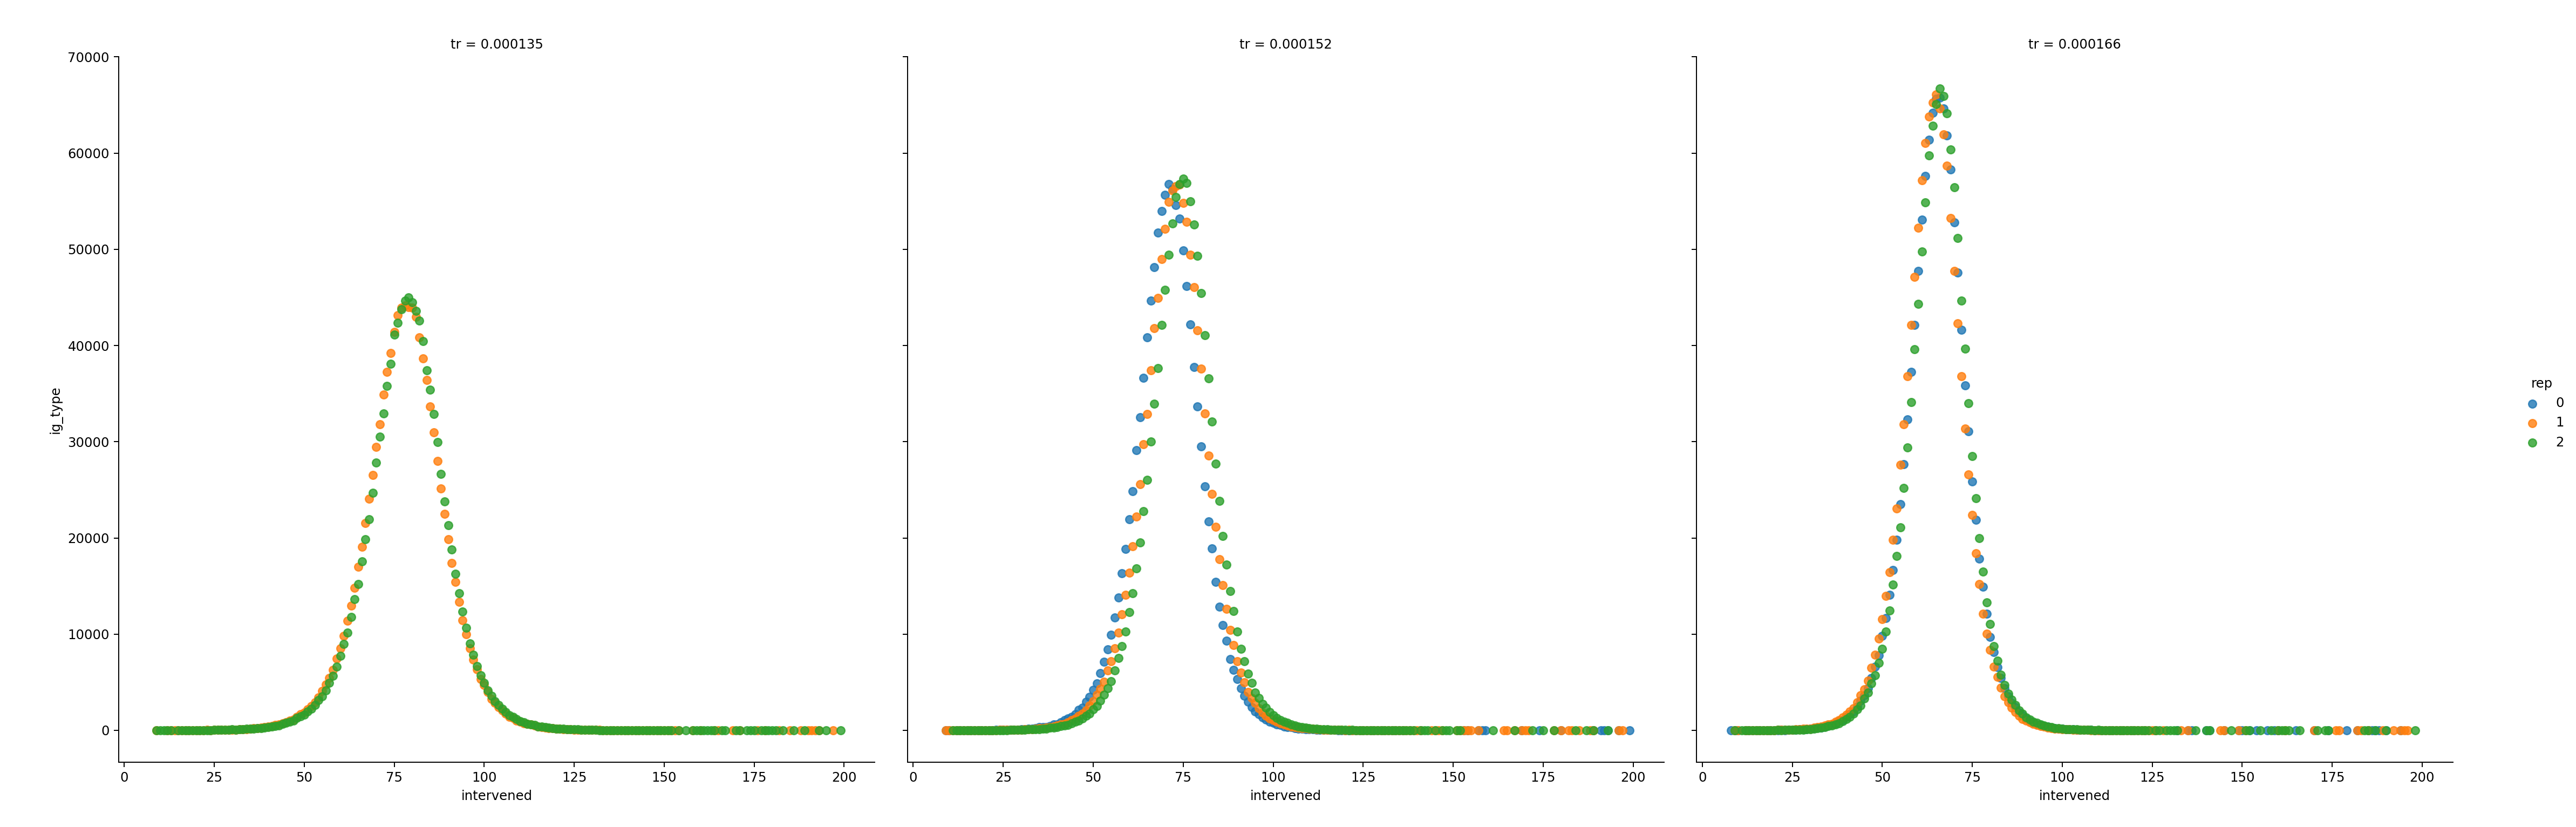

In [24]:
fig = sns.lmplot(x='intervened', y='ig_type', hue='rep', col='tr', fit_reg=False, data=count_mean.reset_index())